# ETL y Exploración de datos

##### En el inicio deben ir los imports

In [292]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

#### Lectura de archivo

In [259]:
# df = pd.read_csv('../data/')
df_mp2_5 = pd.read_csv('../data/datos_mp2_5.csv', delimiter=';', decimal=',')
df_mp10 = pd.read_csv('../data/datos_mp10.csv', delimiter=';', decimal=',')
df_so2 = pd.read_csv('../data/datos_so2.csv', delimiter=';', decimal=',')
df_temp = pd.read_csv('../data/temperaturas.csv', delimiter=',', decimal='.')

In [260]:
print(df_so2)

      FECHA (YYMMDD)  HORA (HHMM)  Registros validados  \
0             180601            0                 1.08   
1             180602            0                 1.00   
2             180603            0                 1.00   
3             180604            0                 1.00   
4             180605            0                 1.00   
...              ...          ...                  ...   
2239          240718            0                  NaN   
2240          240719            0                  NaN   
2241          240720            0                  NaN   
2242          240721            0                  NaN   
2243          240722            0                  NaN   

      Registros preliminares  Registros no validados  Unnamed: 5  
0                        NaN                     NaN         NaN  
1                        NaN                     NaN         NaN  
2                        NaN                     NaN         NaN  
3                        NaN       

Lo primero que voy a hacer es cambiar el formato de fechas a dd/mm/yyyy para luego poder separarlo en dd, mm, yyy.

In [261]:
def convert_date(yy_mm_dd):
    yy = int(yy_mm_dd[:2])
    mm = yy_mm_dd[2:4]
    dd = yy_mm_dd[4:6]
    yyyy = f"20{yy:02d}" if yy <= 99 else f"19{yy:02d}"  # Asumiendo fechas del 2000 en adelante
    return f"{dd}/{mm}/{yyyy}"

# Transformamos a str para poder manejarlos en la funcion
df_mp2_5['FECHA (YYMMDD)'] = df_mp2_5['FECHA (YYMMDD)'].astype(str)
df_mp10['FECHA (YYMMDD)'] = df_mp10['FECHA (YYMMDD)'].astype(str)
df_so2['FECHA (YYMMDD)'] = df_so2['FECHA (YYMMDD)'].astype(str)
df_temp['Dia - Mes'] = df_temp['Dia - Mes'].astype(str)

# Utilizamos apply para utilizar la funcion convert_data en toda la columna seleccionada, en este caso las fechas

df_temp["Dia - Mes"] = df_temp["Dia - Mes"].apply(convert_date)
df_mp2_5["FECHA (YYMMDD)"] = df_mp2_5["FECHA (YYMMDD)"].apply(convert_date)
df_mp10["FECHA (YYMMDD)"] = df_mp10["FECHA (YYMMDD)"].apply(convert_date)
df_so2["FECHA (YYMMDD)"] = df_so2["FECHA (YYMMDD)"].apply(convert_date)


In [262]:
df_temp

Dia - Mes  Temperatura media Fecha Momento minima  Temperatura minima  \
0     01/01/2018               19.7               130101                14.9   
1     02/01/2018               19.6               030102                14.9   
2     03/01/2018               19.8               970103                15.0   
3     04/01/2018               19.7               930104                15.0   
4     05/01/2018               19.9               030105                14.8   
...          ...                ...                  ...                 ...   
2191  27/12/2023               19.3               121227                13.3   
2192  28/12/2023               19.3               031228                14.2   
2193  29/12/2023               19.4               121229                14.1   
2194  30/12/2023               19.6               141230                14.3   
2195  31/12/2023               19.6               021231                14.0   

     Fecha Momento maxima  Temperatura maxima  
0                  070101                27.7  
1                  070102                25.0  
2                  980103                25.1  
3                  980104                25.5  
4                  170105                26.8  
...                   ...                 ...  
2191               971227                25.6  
2192               971228                25.9  
2193               971229                25.5  
2194               961230                25.2  
2195               061231                26.3  

[2196 rows x 6 columns]

In [263]:
df_mp10

FECHA (YYMMDD)  HORA (HHMM)  Registros validados  Registros preliminares  \
0        01/06/2013            0              54.1250                     NaN   
1        02/06/2013            0              67.2916                     NaN   
2        03/06/2013            0              76.0416                     NaN   
3        04/06/2013            0              79.5000                     NaN   
4        05/06/2013            0              96.8333                     NaN   
...             ...          ...                  ...                     ...   
4066     19/07/2024            0                  NaN                    46.0   
4067     20/07/2024            0                  NaN                    37.0   
4068     21/07/2024            0                  NaN                    43.0   
4069     22/07/2024            0                  NaN                    30.0   
4070     23/07/2024            0                  NaN                    30.0   

      Registros no validados  Unnamed: 5  
0                        NaN         NaN  
1                        NaN         NaN  
2                        NaN         NaN  
3                        NaN         NaN  
4                        NaN         NaN  
...                      ...         ...  
4066                     NaN         NaN  
4067                     NaN         NaN  
4068                     NaN         NaN  
4069                     NaN         NaN  
4070                     NaN         NaN  

[4071 rows x 6 columns]

In [264]:
df_so2

FECHA (YYMMDD)  HORA (HHMM)  Registros validados  Registros preliminares  \
0        01/06/2018            0                 1.08                     NaN   
1        02/06/2018            0                 1.00                     NaN   
2        03/06/2018            0                 1.00                     NaN   
3        04/06/2018            0                 1.00                     NaN   
4        05/06/2018            0                 1.00                     NaN   
...             ...          ...                  ...                     ...   
2239     18/07/2024            0                  NaN                     1.0   
2240     19/07/2024            0                  NaN                     1.0   
2241     20/07/2024            0                  NaN                     1.0   
2242     21/07/2024            0                  NaN                     1.0   
2243     22/07/2024            0                  NaN                     1.0   

      Registros no validados  Unnamed: 5  
0                        NaN         NaN  
1                        NaN         NaN  
2                        NaN         NaN  
3                        NaN         NaN  
4                        NaN         NaN  
...                      ...         ...  
2239                     NaN         NaN  
2240                     NaN         NaN  
2241                     NaN         NaN  
2242                     NaN         NaN  
2243                     NaN         NaN  

[2244 rows x 6 columns]

In [265]:
df_mp2_5

FECHA (YYMMDD)  HORA (HHMM)  Registros validados  Registros preliminares  \
0        01/06/2013            0              22.3333                     NaN   
1        02/06/2013            0              25.5833                     NaN   
2        03/06/2013            0              43.5833                     NaN   
3        04/06/2013            0              42.3333                     NaN   
4        05/06/2013            0              49.1666                     NaN   
...             ...          ...                  ...                     ...   
4066     19/07/2024            0                  NaN                    18.0   
4067     20/07/2024            0                  NaN                    16.0   
4068     21/07/2024            0                  NaN                    13.0   
4069     22/07/2024            0                  NaN                    10.0   
4070     23/07/2024            0                  NaN                     8.0   

      Registros no validados  Unnamed: 5  
0                        NaN         NaN  
1                        NaN         NaN  
2                        NaN         NaN  
3                        NaN         NaN  
4                        NaN         NaN  
...                      ...         ...  
4066                     NaN         NaN  
4067                     NaN         NaN  
4068                     NaN         NaN  
4069                     NaN         NaN  
4070                     NaN         NaN  

[4071 rows x 6 columns]

In [266]:
# Verificar si hay valores nulos en el DataFrame
null_counts = df_temp.isnull().sum()
print("Conteo de valores nulos por columna:")
print(null_counts)

# Obtener una lista de columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("\nColumnas con valores nulos:")
print(columns_with_nulls)

Conteo de valores nulos por columna:
Dia - Mes               0
Temperatura media       0
Fecha Momento minima    0
Temperatura minima      0
Fecha Momento maxima    0
Temperatura maxima      0
dtype: int64

Columnas con valores nulos:
[]


Ahora debemos limitar los registros por fecha desde enero de 2018 hasta el 1 de enero del 2024

In [267]:
# Hay un error en el dataset de temperaturas, existe la fecha 29/02/2018 pero el 2018 no corresponde a
# un año biciesto

# Ajustar la configuración de pandas
pd.set_option('display.max_rows', None)  # Mostrar todas las filas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', None)  # Ajustar el ancho a la longitud de la salida
pd.set_option('display.max_colwidth', None)  # Mostrar contenido completo en cada celda

# Imprimir todo el DataFrame
print(df_temp)

# Restaurar la configuración predeterminada si es necesario
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')
pd.reset_option('display.max_colwidth')

df_temp =df_temp.drop(59)
df_temp =df_temp.drop(425)
df_temp =df_temp.drop(1157)
df_temp =df_temp.drop(1523)
df_temp =df_temp.drop(1889)

       Dia - Mes  Temperatura media Fecha Momento minima  Temperatura minima  \
0     01/01/2018               19.7               130101                14.9   
1     02/01/2018               19.6               030102                14.9   
2     03/01/2018               19.8               970103                15.0   
3     04/01/2018               19.7               930104                15.0   
4     05/01/2018               19.9               030105                14.8   
5     06/01/2018               20.0               940106                15.0   
6     07/01/2018               20.0               130107                14.6   
7     08/01/2018               20.1               130108                14.7   
8     09/01/2018               20.1               110109                14.9   
9     10/01/2018               20.0               960110                14.5   
10    11/01/2018               20.0               110111                15.0   
11    12/01/2018               20.0     

In [268]:
df_so2['FECHA (YYMMDD)'] = pd.to_datetime(df_so2['FECHA (YYMMDD)'], format='%d/%m/%Y')
df_mp10['FECHA (YYMMDD)'] = pd.to_datetime(df_mp10['FECHA (YYMMDD)'], format='%d/%m/%Y')
df_mp2_5['FECHA (YYMMDD)'] = pd.to_datetime(df_mp2_5['FECHA (YYMMDD)'], format='%d/%m/%Y')
df_temp['Dia - Mes'] = pd.to_datetime(df_temp['Dia - Mes'], format='%d/%m/%Y')

# Definir el rango de fechas
start_date = pd.to_datetime('01/01/2018')
end_date = pd.to_datetime('01/01/2024')

# Filtrar el DataFrame basado en el rango de fechas
df_filtered_so2 = df_so2[(df_so2['FECHA (YYMMDD)'] >= start_date) & (df_so2['FECHA (YYMMDD)'] < end_date)]
df_filtered_mp10 = df_mp10[(df_mp10['FECHA (YYMMDD)'] >= start_date) & (df_mp10['FECHA (YYMMDD)'] < end_date)]
df_filtered_mp2_5 = df_mp2_5[(df_mp2_5['FECHA (YYMMDD)'] >= start_date) & (df_mp2_5['FECHA (YYMMDD)'] < end_date)]
df_filtered_temp = df_temp[(df_temp['Dia - Mes'] >= start_date) & (df_temp['Dia - Mes'] < end_date)]
print(df_filtered_so2)

     FECHA (YYMMDD)  HORA (HHMM)  Registros validados  Registros preliminares  \
0        2018-06-01            0                 1.08                     NaN   
1        2018-06-02            0                 1.00                     NaN   
2        2018-06-03            0                 1.00                     NaN   
3        2018-06-04            0                 1.00                     NaN   
4        2018-06-05            0                 1.00                     NaN   
...             ...          ...                  ...                     ...   
2035     2023-12-27            0                 1.00                     NaN   
2036     2023-12-28            0                 1.00                     NaN   
2037     2023-12-29            0                 1.00                     NaN   
2038     2023-12-30            0                 1.00                     NaN   
2039     2023-12-31            0                 1.00                     NaN   

      Registros no validado

Ahora que tenemos todas las fechas en el mismo formato, ademas en los mismos rangos vamos a unir todos los df para proceder a tratar todos los valores anormales, hacemos unos ajustes a los nombres de las columnas para no confundir cual es cual.

In [269]:
df_filtered_temp = df_filtered_temp.rename(columns={'Dia - Mes': 'FECHA (YYMMDD)'})
df_filtered_so2 = df_filtered_so2.rename(columns={'Registros validados': 'Registros validos so2'})
df_filtered_mp10 = df_filtered_mp10.rename(columns={'Registros validados': 'Registros validos mp10'})
df_filtered_mp2_5 = df_filtered_mp2_5.rename(columns={'Registros validados': 'Registros validos mp2_5'})


df_final= pd.merge(df_filtered_temp,df_filtered_mp10, on='FECHA (YYMMDD)', how='outer')
df_final= pd.merge(df_final, df_filtered_mp2_5, on='FECHA (YYMMDD)', how='outer')
df_final = pd.merge(df_final, df_filtered_so2, on='FECHA (YYMMDD)', how='outer')

In [270]:
df_final

FECHA (YYMMDD)  Temperatura media Fecha Momento minima  \
0        2018-01-01               19.7               130101   
1        2018-01-02               19.6               030102   
2        2018-01-03               19.8               970103   
3        2018-01-04               19.7               930104   
4        2018-01-05               19.9               030105   
...             ...                ...                  ...   
2186     2023-12-27               19.3               121227   
2187     2023-12-28               19.3               031228   
2188     2023-12-29               19.4               121229   
2189     2023-12-30               19.6               141230   
2190     2023-12-31               19.6               021231   

      Temperatura minima Fecha Momento maxima  Temperatura maxima  \
0                   14.9               070101                27.7   
1                   14.9               070102                25.0   
2                   15.0               980103                25.1   
3                   15.0               980104                25.5   
4                   14.8               170105                26.8   
...                  ...                  ...                 ...   
2186                13.3               971227                25.6   
2187                14.2               971228                25.9   
2188                14.1               971229                25.5   
2189                14.3               961230                25.2   
2190                14.0               061231                26.3   

      HORA (HHMM)_x  Registros validos mp10  Registros preliminares_x  \
0                 0                    25.0                       NaN   
1                 0                    25.0                       NaN   
2                 0                    26.0                       NaN   
3                 0                    23.0                       NaN   
4                 0                    24.0                       NaN   
...             ...                     ...                       ...   
2186              0                    24.0                       NaN   
2187              0                    24.0                       NaN   
2188              0                    23.0                       NaN   
2189              0                    20.0                       NaN   
2190              0                    23.0                       NaN   

      Registros no validados_x  ...  HORA (HHMM)_y  Registros validos mp2_5  \
0                          NaN  ...              0                      6.0   
1                          NaN  ...              0                      4.0   
2                          NaN  ...              0                      6.0   
3                          NaN  ...              0                      6.0   
4                          NaN  ...              0                      7.0   
...                        ...  ...            ...                      ...   
2186                       NaN  ...              0                      6.0   
2187                       NaN  ...              0                      7.0   
2188                       NaN  ...              0                      7.0   
2189                       NaN  ...              0                      4.0   
2190                       NaN  ...              0                     11.0   

      Registros preliminares_y  Registros no validados_y  Unnamed: 5_y  \
0                          NaN                       NaN           NaN   
1                          NaN                       NaN           NaN   
2                          NaN                       NaN           NaN   
3                          NaN                       NaN           NaN   
4                          NaN                       NaN           NaN   
...                        ...                       ...           ...   
2186                       NaN                       NaN           NaN   
2

Ahora vamos  a sacar todas las columnas que en realidad no van a ser utilizadas para el modelo

In [271]:
df_final = df_final.drop(columns=['Fecha Momento minima', 'Fecha Momento maxima', 'HORA (HHMM)', 'HORA (HHMM)_x', 'HORA (HHMM)_y', 'Registros no validados','Registros no validados_x','Registros no validados_y', 'Registros preliminares', 'Registros preliminares_x','Registros preliminares_y','Unnamed: 5', 'Unnamed: 5_x', 'Unnamed: 5_y'])

df_final

FECHA (YYMMDD)  Temperatura media  Temperatura minima  \
0        2018-01-01               19.7                14.9   
1        2018-01-02               19.6                14.9   
2        2018-01-03               19.8                15.0   
3        2018-01-04               19.7                15.0   
4        2018-01-05               19.9                14.8   
...             ...                ...                 ...   
2186     2023-12-27               19.3                13.3   
2187     2023-12-28               19.3                14.2   
2188     2023-12-29               19.4                14.1   
2189     2023-12-30               19.6                14.3   
2190     2023-12-31               19.6                14.0   

      Temperatura maxima  Registros validos mp10  Registros validos mp2_5  \
0                   27.7                    25.0                      6.0   
1                   25.0                    25.0                      4.0   
2                   25.1                    26.0                      6.0   
3                   25.5                    23.0                      6.0   
4                   26.8                    24.0                      7.0   
...                  ...                     ...                      ...   
2186                25.6                    24.0                      6.0   
2187                25.9                    24.0                      7.0   
2188                25.5                    23.0                      7.0   
2189                25.2                    20.0                      4.0   
2190                26.3                    23.0                     11.0   

      Registros validos so2  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
2186                    1.0  
2187                    1.0  
2188                    1.0  
2189                    1.0  
2190                    1.0  

[2191 rows x 7 columns]

Continuamos con el manejo de datos con errores.

In [272]:
# Verificar si hay valores nulos en el DataFrame
null_counts = df_final.isnull().sum()
print("Conteo de valores nulos por columna:")
print(null_counts)

# Obtener una lista de columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("\nColumnas con valores nulos:")
print(columns_with_nulls)

Conteo de valores nulos por columna:
FECHA (YYMMDD)               0
Temperatura media            0
Temperatura minima           0
Temperatura maxima           0
Registros validos mp10      53
Registros validos mp2_5     69
Registros validos so2      623
dtype: int64

Columnas con valores nulos:
['Registros validos mp10', 'Registros validos mp2_5', 'Registros validos so2']


In [273]:
df_final.describe()

FECHA (YYMMDD)  Temperatura media  Temperatura minima  \
count                 2191        2191.000000         2191.000000   
mean   2020-12-31 00:00:00          16.704153           11.264309   
min    2018-01-01 00:00:00          13.400000            5.900000   
25%    2019-07-02 12:00:00          14.500000            9.000000   
50%    2020-12-31 00:00:00          16.300000           11.100000   
75%    2022-07-01 12:00:00          18.900000           13.700000   
max    2023-12-31 00:00:00          20.700000           15.800000   
std                    NaN           2.287611            2.557891   

       Temperatura maxima  Registros validos mp10  Registros validos mp2_5  \
count         2191.000000             2138.000000              2122.000000   
mean            23.253583               33.074369                10.680019   
min             18.800000                7.000000                 2.000000   
25%             21.000000               26.000000                 7.000000   
50%             22.700000               32.000000                10.000000   
75%             25.400000               39.000000                13.000000   
max             31.800000              108.000000                27.000000   
std              2.642360               10.136069                 4.310100   

       Registros validos so2  
count            1568.000000  
mean                1.011888  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.000000  
max                 2.760000  
std                 0.060713

Podemos observar que So2 es la columna con mas nulos, en el caso de mp10 y mp2_5 con respecto a la cantidad total de datos es menor la cantidad de nulos. Al ser demasiados nulos en SO2, no podemos tomar la estrategia de eliminarlos, por lo que se trabajara reemplazando los nulos por la media de todos sus valores, utilizando la misma estrategia para las otras columnas de mp10 y mp2_5

In [275]:
df_final= df_final.fillna(df_final.mean())

# Verificar si hay valores nulos en el DataFrame
null_counts = df_final.isnull().sum()
print("Conteo de valores nulos por columna:")
print(null_counts)

# Obtener una lista de columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0].index.tolist()
print("\nColumnas con valores nulos:")
print(columns_with_nulls)

df_final.describe()

Conteo de valores nulos por columna:
FECHA (YYMMDD)             0
Temperatura media          0
Temperatura minima         0
Temperatura maxima         0
Registros validos mp10     0
Registros validos mp2_5    0
Registros validos so2      0
dtype: int64

Columnas con valores nulos:
[]


FECHA (YYMMDD)  Temperatura media  Temperatura minima  \
count                 2191        2191.000000         2191.000000   
mean   2020-12-31 00:00:00          16.704153           11.264309   
min    2018-01-01 00:00:00          13.400000            5.900000   
25%    2019-07-02 12:00:00          14.500000            9.000000   
50%    2020-12-31 00:00:00          16.300000           11.100000   
75%    2022-07-01 12:00:00          18.900000           13.700000   
max    2023-12-31 00:00:00          20.700000           15.800000   
std                    NaN           2.287611            2.557891   

       Temperatura maxima  Registros validos mp10  Registros validos mp2_5  \
count         2191.000000             2191.000000              2191.000000   
mean            23.253583               33.074369                10.680019   
min             18.800000                7.000000                 2.000000   
25%             21.000000               26.000000                 8.000000   
50%             22.700000               32.000000                10.000000   
75%             25.400000               39.000000                13.000000   
max             31.800000              108.000000                27.000000   
std              2.642360               10.012667                 4.241658   

       Registros validos so2  
count            2191.000000  
mean                1.011888  
min                 1.000000  
25%                 1.000000  
50%                 1.000000  
75%                 1.011888  
max                 2.760000  
std                 0.051356

Finalmente sacamos el df_final a excel, para poder utilizarlo posteriormente en el main.

In [279]:
# Exportar el DataFrame a un archivo Excel
df_final.to_excel('../data/datos_finales.xlsx', index=False, engine='openpyxl')

## Exploración visual de los datos

En esta seccion repasaremos algunos graficos para ver la condición de los datos y ver algunas relaciones basicas entre los datos

## Graficos estaticos

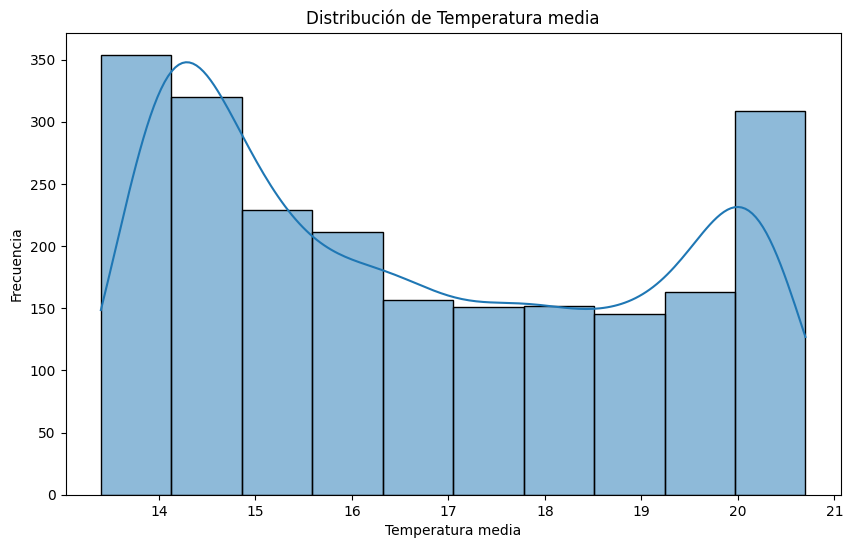

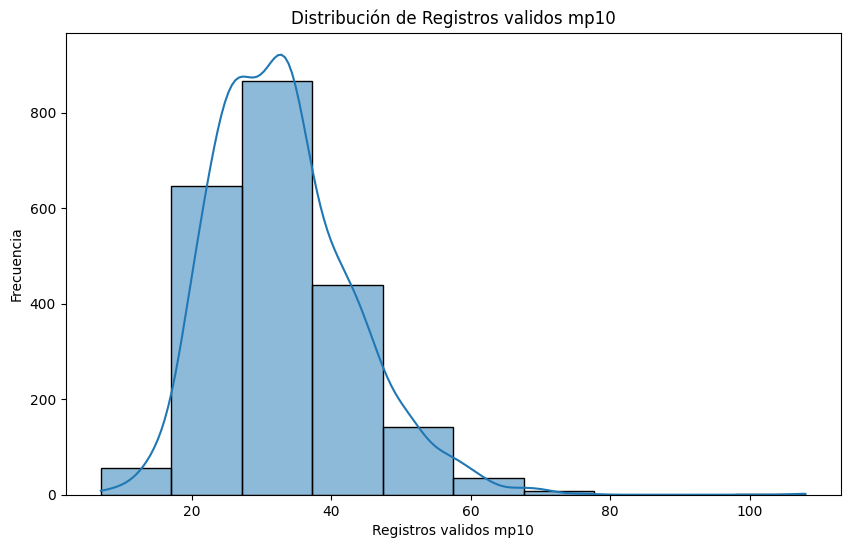

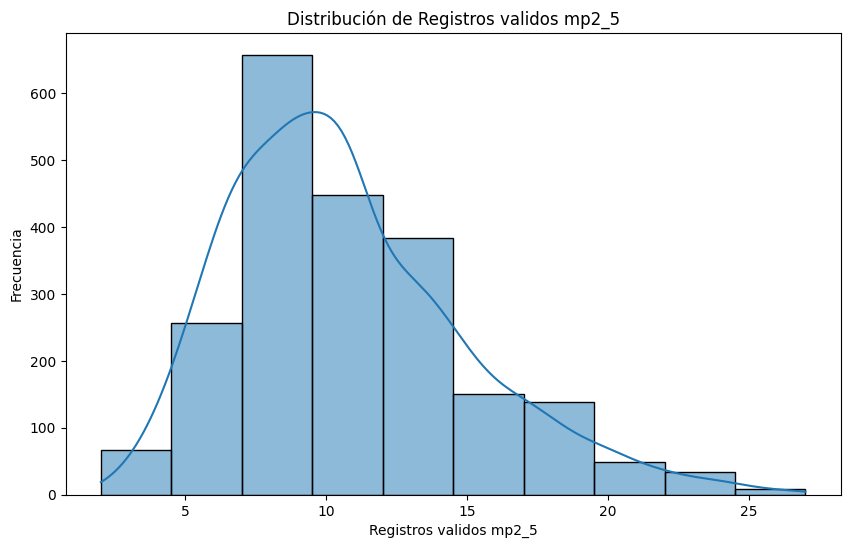

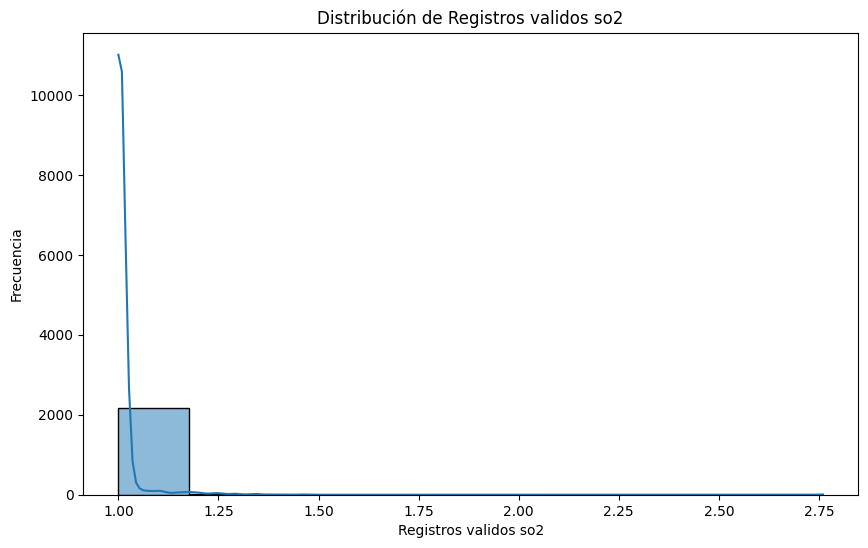

In [285]:
# Convertir la columna 'FECHA (YYMMDD)' a datetime
df_final['FECHA (YYMMDD)'] = pd.to_datetime(df_final['FECHA (YYMMDD)'])

# Lista de columnas numéricas para crear histogramas
columnas_numericas = ['Temperatura media', 'Registros validos mp10', 'Registros validos mp2_5', 'Registros validos so2']

# Crear histogramas para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_final[columna], bins=10, kde=True)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

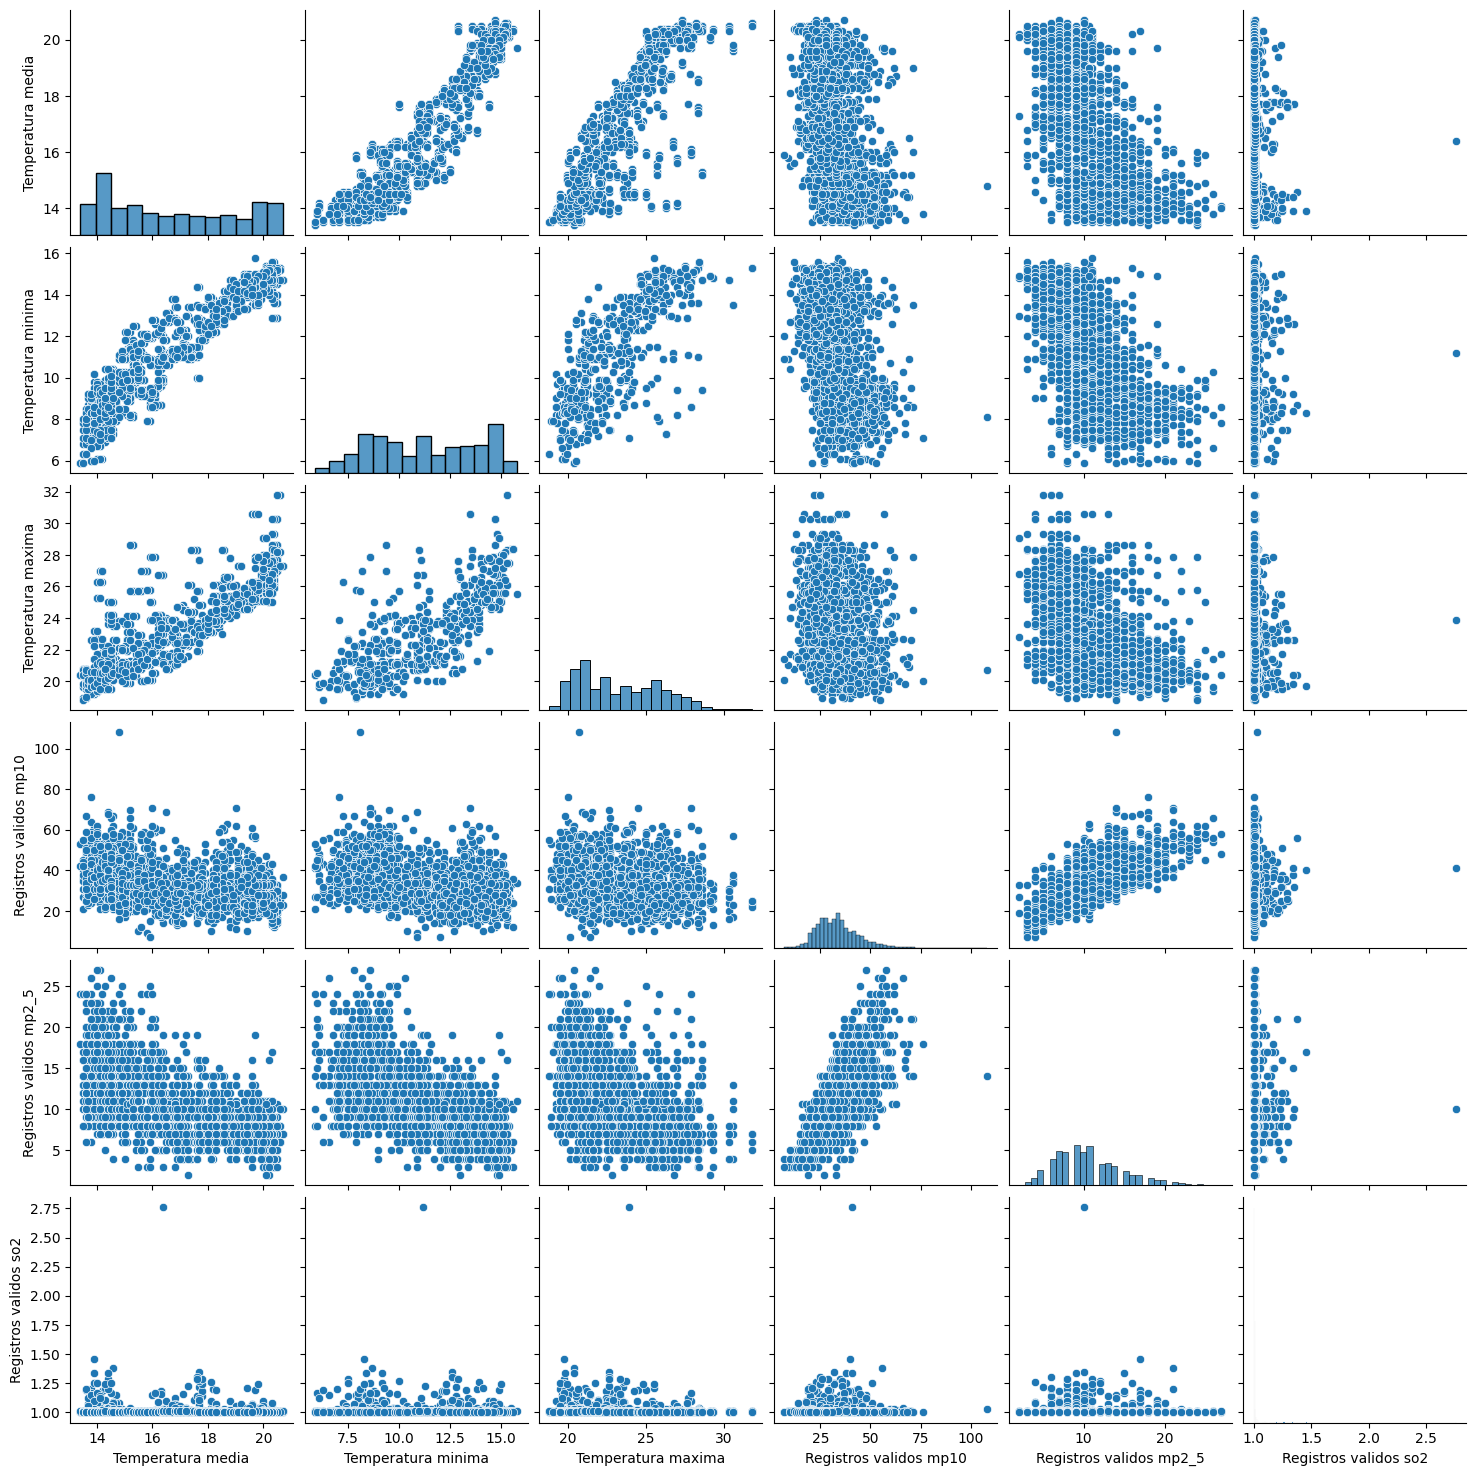

In [287]:
# Gráfico de pairplot
sns.pairplot(df_final)
plt.show()

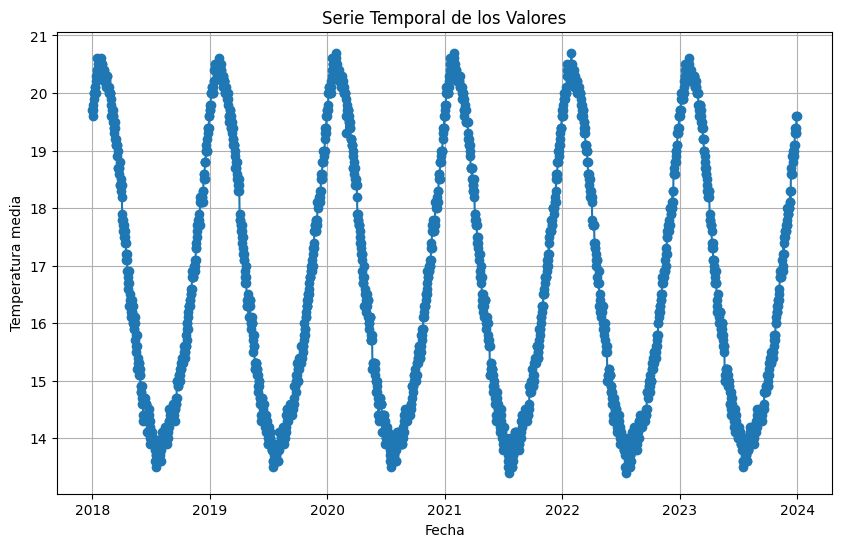

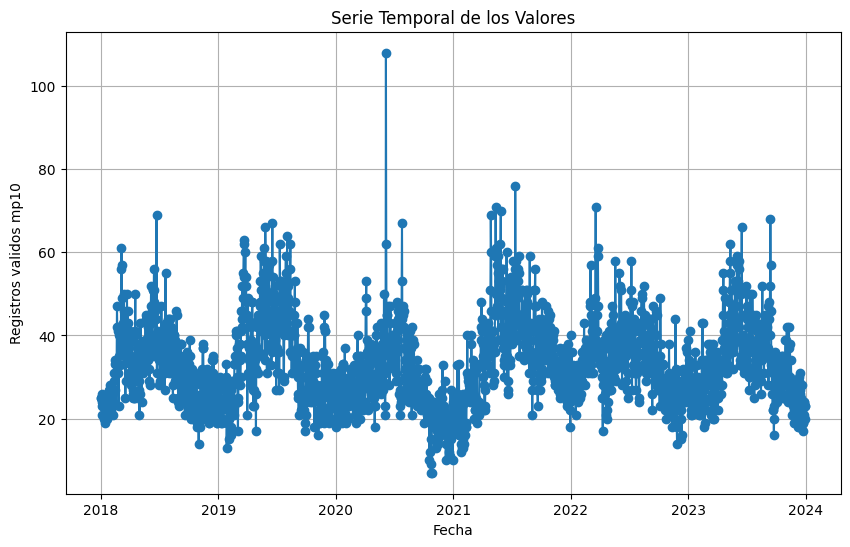

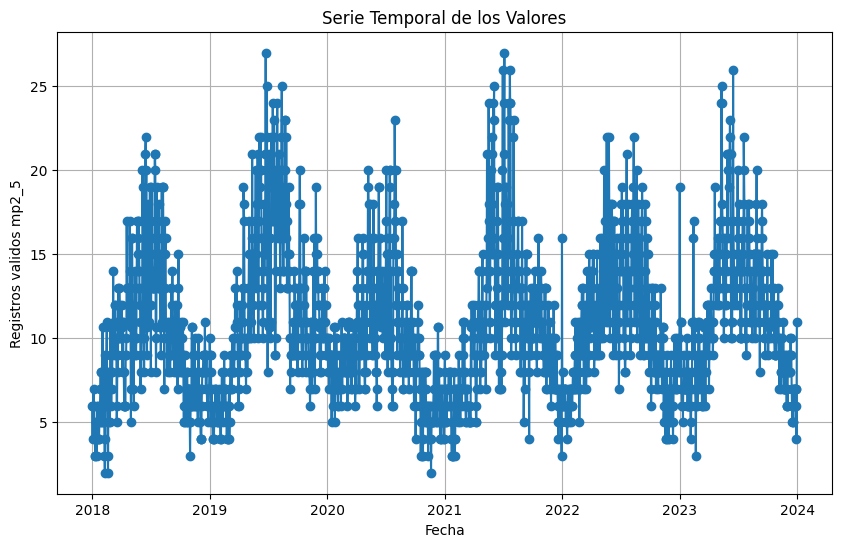

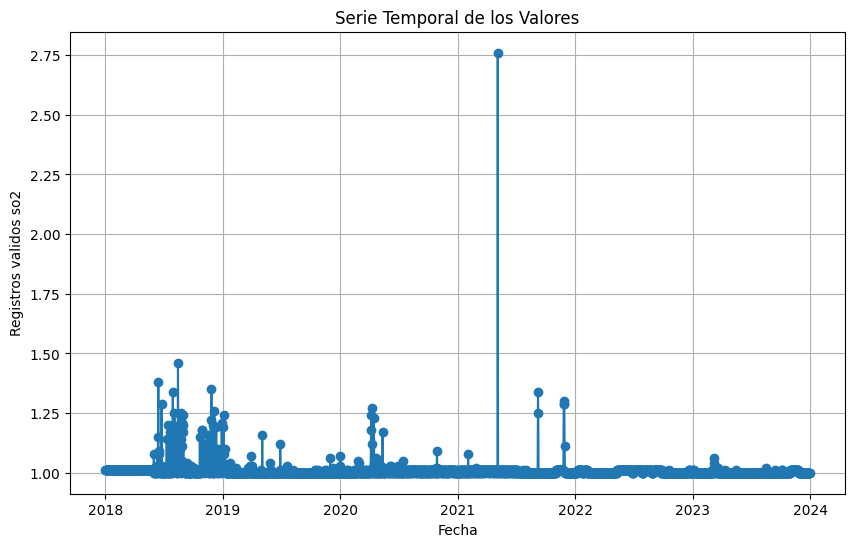

In [290]:
# Crear graficos de caja para cada columna numérica
for columna in columnas_numericas:
    plt.figure(figsize=(10, 6))
    plt.plot(df_final['FECHA (YYMMDD)'], df_final[columna], marker='o', linestyle='-')
    plt.title('Serie Temporal de los Valores')
    plt.xlabel('Fecha')
    plt.ylabel(columna)
    plt.grid(True)
    plt.show()

## Graficos interactivos

Utilizando la herramienta plotly creamos graficos interactivos

In [293]:
fig = go.Figure()

# Agregar líneas para cada variable
fig.add_trace(go.Scatter(x=df_final['FECHA (YYMMDD)'], y=df_final['Registros validos mp10'], mode='lines', name='MP10'))
fig.add_trace(go.Scatter(x=df_final['FECHA (YYMMDD)'], y=df_final['Registros validos mp2_5'], mode='lines', name='MP2.5'))
fig.add_trace(go.Scatter(x=df_final['FECHA (YYMMDD)'], y=df_final['Registros validos so2'], mode='lines', name='SO2'))

# Añadir detalles al gráfico
fig.update_layout(
    title='Concentraciones de Contaminantes a lo Largo del Tiempo',
    xaxis_title='Fecha',
    yaxis_title='Concentración',
    legend_title='Contaminantes',
    template='plotly_dark'
)

# Mostrar el gráfico
fig.show()

## Conclusiones

Se puede observar que hay una correlación entre la temperatura media atraves del tiempo y el comportamiento de mp10 y mp2_5 atraves del tiempo, tambien podemos observar que no hay una clara tendencia en los registros de SO2. Finalmente vemos como existen algunos valores que podrian ser 'outlayers' dentro de SO2 y mp10 que tal vez puedan afectar el entrenamiento del algoritmo de predicción.

Por las formas presentes en los pairplot se muestra una tendencia que indica una alta probabilidad de ser capaces de armar un algoritmo que sea capaz de predecir de buena manera los valores de mp10 y mp2_5. En el caso ded la predicción de SO2 no me adelantaria a sacar conclusiones.